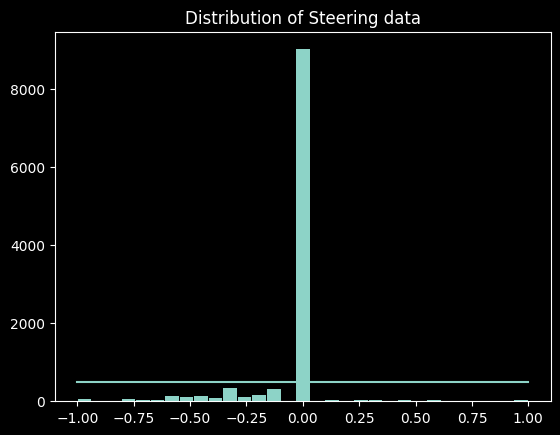

removed imgs:  8517
remain imgs:  2327


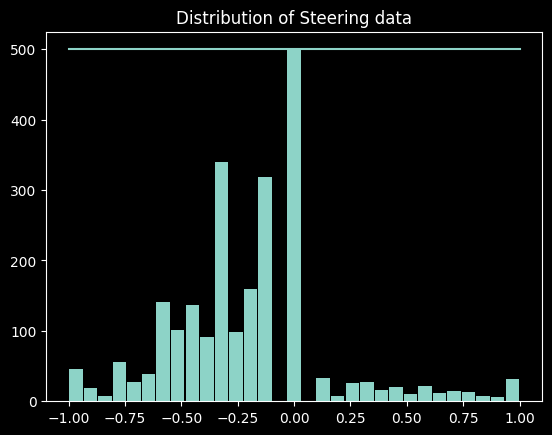

,Center,Left,Right,Steering,Throttle,Brake,Speed
5,center_2022_12_07_20_20_06_777.jpg,C:\Users\viet tran\Desktop\cnn_data\IMG\left_2...,C:\Users\viet tran\Desktop\cnn_data\IMG\right_...,-0.15,0.000000,0,8.802803
6,center_2022_12_07_20_20_06_894.jpg,C:\Users\viet tran\Desktop\cnn_data\IMG\left_2...,C:\Users\viet tran\Desktop\cnn_data\IMG\right_...,-0.45,0.000000,0,8.644262
7,center_2022_12_07_20_20_07_015.jpg,C:\Users\viet tran\Desktop\cnn_data\IMG\left_2...,C:\Users\viet tran\Desktop\cnn_data\IMG\right_...,-0.75,0.000000,0,8.440108
15,center_2022_12_07_20_20_07_966.jpg,C:\Users\viet tran\Desktop\cnn_data\IMG\left_2...,C:\Users\viet tran\Desktop\cnn_data\IMG\right_...,-0.30,0.908439,0,11.295030
16,center_2022_12_07_20_20_08_100.jpg,C:\Users\viet tran\Desktop\cnn_data\IMG\left_2...,C:\Users\viet tran\Desktop\cnn_data\IMG\right_...,0.00,1.000000,0,12.611430
...,...,...,...,...,...,...,...
10817,center_2023_01_01_10_11_55_554.jpg,C:\Users\viet tran\Desktop\Masterthesis\Progra...,C:\Users\viet tran\Desktop\Masterthesis\Progra...,-0.65,1.000000,0,30.126260
10824,center_2023_01_01_10_11_56_291.jpg,C:\Users\viet tran\Desktop\Masterthesis\Progra...,C:\Users\viet tran\Desktop\Masterthesis\Progra...,-0.30,0.000000,0,28.514140
10834,center_2023_01_01_10_11_57_375.jpg,C:\Users\viet tran\Desktop\Masterthesis\Progra...,C:\Users\viet tran\Desktop\Masterthesis\Progra...,-0.25,0.000000,0,25.430370
10835,center_2023_01_01_10_11_57_440.jpg,C:\Users\viet tran\Desktop\Masterthesis\Progra...,C:\Users\viet tran\Desktop\Masterthesis\Progra...,-0.40,0.000000,0,25.205020


In [2]:
from helper import * 
from sklearn.model_selection import train_test_split

path = 'cnn_data'
df = load_data(f'{path}/driving_log.csv')
df = balance_data(df, 'Steering', sample_remain=500)
df

The car go straight most of the time that makes steering values around 0 extremely higher than the other. Drop the steering data to balance the whole dataset. 

In [3]:
imgPath, steering = load_data_to_array(path, df)
# fixed value for random_state to keep train and test datasets same each time
X_train, X_val, Y_train, Y_val = train_test_split(imgPath, steering, test_size=0.2, random_state=1) 
X_train, Y_train = img_preprocess_pipeline(X_train, Y_train)
X_val, Y_val = img_preprocess_pipeline(X_val, Y_val)

print(X_train.shape)
print(Y_train.shape)
print("Training imgs: ", len(X_train))
print("Test imgs: ", len(X_val))

(1861, 66, 200, 3)
(1861,)
Training imgs:  1861
Test imgs:  466


In [6]:
imgPath

array(['cnn_data\\IMG\\center_2022_12_07_20_20_06_777.jpg',
       'cnn_data\\IMG\\center_2022_12_07_20_20_06_894.jpg',
       'cnn_data\\IMG\\center_2022_12_07_20_20_07_015.jpg', ...,
       'cnn_data\\IMG\\center_2023_01_01_10_11_57_375.jpg',
       'cnn_data\\IMG\\center_2023_01_01_10_11_57_440.jpg',
       'cnn_data\\IMG\\center_2023_01_01_10_11_58_260.jpg'], dtype='<U47')

In [4]:
a

NameError: name 'a' is not defined

In [ ]:
from keras.callbacks import ModelCheckpoint

opt = 'adam'
lr = 0.001
dropout = 0.4
optim = build_optimizer(opt, lr)
model = build_network('relu', optim, dropout)

# checkpoint_path = f'model/{opt}-{lr}.hdf5'
# checkpoint_callback = ModelCheckpoint(
#     filepath=checkpoint_path,
#     monitor='val_loss',
#     verbose=1,
#     save_best_only=True
# )

In [ ]:

''' 
Iterations: number of batches to complete one epoch 
Batches: number of training samples in one iteration 
Steps per epoch = number of training sample // batch size
'''
# hist = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), batch_size=20, 
#                 epochs=10, callbacks=[checkpoint_callback])
hist = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), batch_size=20, epochs=5)

In [ ]:
print(hist)

In [ ]:
import plotly.express as px 

fig = px.line(y=[hist.history['loss'], hist.history['val_loss']])
fig.show()

In [ ]:
# from keras.models import load_model

# model = load_model(checkpoint_path)
# hist = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), batch_size=batch_size,
#                 epochs=10, callbacks=[checkpoint_callback])